<a href="https://colab.research.google.com/github/GKS07/The-Sparks-Foundation/blob/main/Percentage_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**



##**Author : Gaurav Kumar Singh**

##**Task 1**
###**Simple Linear Regression**
*In this task we will use linear Regression model to predict the expected score of the students based on their study hours.*

###**importing the libraries**

In [30]:
# importing the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

####**importing the data**

In [2]:
# importing the data
url = "http://bit.ly/w-data"

data = pd.read_csv(url)
print("data is imported.")

data is imported.


###**Exploring data**

In [3]:
# understanding the data
data.shape 

(25, 2)

So we have 25 rows and 2 coulmns.

In [4]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


here  we have the hours that a student study and what percentage he scores in examination. so score is our target variable. now lets plot a scatter chart to see the relation between this two features.

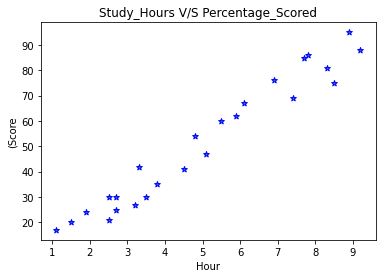

In [5]:
plt.scatter(x = data.Hours, y = data.Scores, marker = '*', edgecolors = 'blue')
plt.title("Study_Hours V/S Percentage_Scored")
plt.xlabel("Hour")
plt.ylabel("(Score")
plt.show()

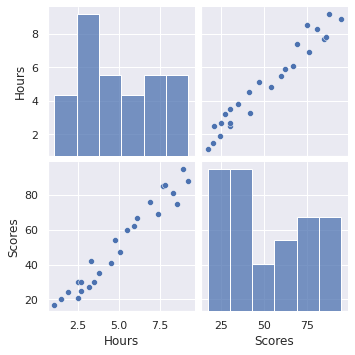

In [31]:
# paired plot using seaborn

sns.set()
sns.pairplot(data[['Hours','Scores']])

Now lets, seperate our target variable and dependent variable.

In [8]:
# preparing the data for our linear model
x = data.iloc[ :, :-1].values # is our dependent variable hours of study
y = data.iloc[ :, 1].values# is our target variable percentage scores

#**Lets, create our Linear Model** 

In [9]:
# spliting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
# Creating the Linear Model
linear_model = LinearRegression() # creating the object of the linear Regression
linear_model.fit(x_train,y_train) # fitting the traning data to the linear model
y_pred = linear_model.predict(x_test) # predicting the results for test data

###**Comparing the real and predicted score**

In [11]:
#comparing the actual and predicted results
comp = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
comp

,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


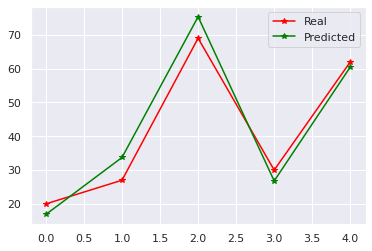

In [29]:
# visualizing the real and predicted score

comp.plot(marker = '*', color = ['red','green'])

##**Visualizing the Traning and Test Data**

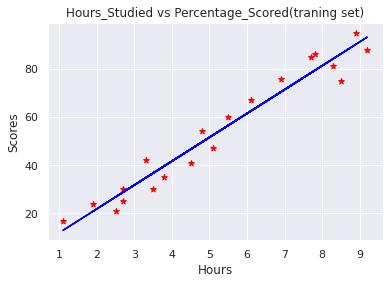

In [12]:
# visualizing the traning data

plt.scatter(x_train, y_train, color = 'red', marker= '*')
plt.plot(x_train,linear_model.predict(x_train), color = 'blue')
plt.title("Hours_Studied vs Percentage_Scored(traning set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

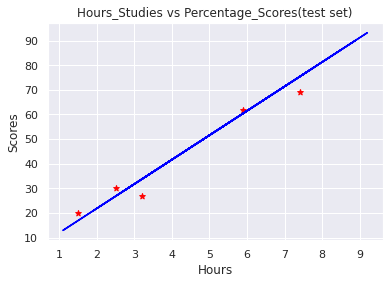

In [13]:
#visualizing the test data

plt.scatter(x_test, y_test, color = 'red', marker='*')
plt.plot(x_train,linear_model.predict(x_train), color = 'blue')
plt.title("Hours_Studies vs Percentage_Scores(test set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


##**Evaluating the model**

In [14]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


##Prediction on new Data

In [15]:
# predicting the score of student who study 9.25 hrs/day.
hrs = [[9.25]]
pred = linear_model.predict(hrs)
print("student who study",hrs[0],"hours per day are likely to get",pred[0],"percentage")

student who study [9.25] hours per day are likely to get 93.69173248737539 percentage
